8 - 9 : ADDED VIDEO OUT AND THE PLOT SHOULD BE FIXED FOR NON-GRASHOFF

In [1]:
def mechtype(l1, l2, l3, l4):
    L = [l1, l2, l3, l4]
    L.sort()
    lmax = L[-1]
    lmin = L[0]
    la = L[1]
    lb = L[2]
    
    if lmax + lmin <= la + lb:
        return 0 #Grashoff
    elif lmax + lmin > la + lb:
        return 1 #non grashoff

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import matplotlib.patches as patches
import cv2

In [3]:
def angles(r1, r2, r3, r4, theta):
    
    S = np.sqrt(r1 ** 2 + r2 ** 2 - 2 * r1 * r2 * np.cos(theta))
    beta = np.arccos((r1 ** 2 + S ** 2 - r2 ** 2) / (2 * r1 * S))
    syi = np.arccos((r3 ** 2 + S ** 2 - r4 ** 2) / (2 * r3 * S))
    lamda = np.arccos((r4 ** 2 + S ** 2 - r3 ** 2) / (2 * r4 * S))
    
    return beta, syi, lamda

def fangles(theta2, B, S, L):
    if 0 <= theta2 <= np.pi:
        theta3_1 = -B + S
        theta3_2 = -B - S
        
        theta4_1 = np.pi - B - L 
        theta4_2 = np.pi - B + L
    
    elif np.pi < theta2 <= 2 * np.pi:
        theta3_1 = B + S
        theta3_2 = B - S
        
        theta4_1 = np.pi + B - L
        theta4_2 = np.pi + B + L
    return theta3_1, theta3_2, theta4_1, theta4_2

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define your line lengths, the order is standard
l1 = 3
l2 = 2
l3 = 4
l4 = 6
mechtype(l1, l2, l3, l4)

1

In [73]:
# enter the values of you're desired inputs
theta2 = np.pi / 1.5
B, S, L = angles(l1, l2, l3, l4, theta2)

# for i in range(len(B)):
allangles = fangles(theta2, B, S, L)
theta3_1 = allangles[0]
theta3_2 = allangles[1]
theta4_1 = allangles[2]
theta4_2 = allangles[3]

# np.array(theta4_1) * 180 / np.pi + 15

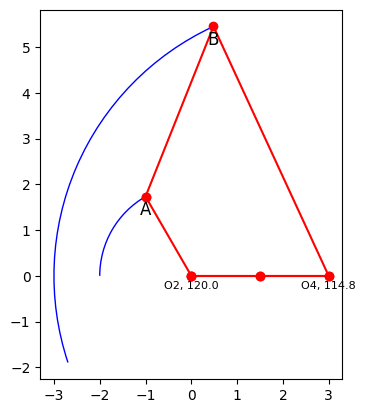

In [74]:
# Create a figure and axis
import math
fig, ax = plt.subplots()

# Define the starting point of line 1
l1x = np.linspace(0, l1, l1)
l1y = np.linspace(0, 0, l1)


# arc made by O2
center2 = (l1x[0], l1y[0])
radius2 = l2
sangle2 = theta2 * 180 / np.pi
eangle2 = 180 # open to change

arc2 = patches.Arc(center2, 2 * radius2, 2 * radius2, theta1=sangle2, theta2=eangle2, fill=False, color='blue')
ax.add_patch(arc2)
plt.plot(l1x, l1y, color='red', marker='o')
plt.text(l1x[0], l1y[0] - 0.1, f'O2, {round(sangle2, 2)}', fontsize=8, color='black', ha='center', va='top')
# end of O2 arc

# arc made by O4
center4 = (l1x[-1], l1y[-1])
radius4 = l4
sangle4 = theta4_1 * 180 / np.pi
eangle4 = theta4_2 * 180 / np.pi

arc4 = patches.Arc(center4, 2 * radius4, 2 * radius4, theta1=sangle4, theta2=eangle4, fill=False, color='blue')
ax.add_patch(arc4)
plt.plot(l1x, l1y, color='red', marker='o')
plt.text(l1x[-1], l1y[-1] - 0.1, f'O4, {round(sangle4, 2)}', fontsize=8, color='black', ha='center', va='top')
#end of 04




# arc made by A
lax = l2 * np.cos(theta2)
lay = l2 * np.sin(theta2)

plt.plot([l1x[0], lax], [l1y[0], lay], c = 'red',  marker='o')
plt.text(lax, lay - 0.1, 'A', fontsize=12, color='black', ha='center', va='top')

center3 = (lax, lay)
radius3 = l3
sangle3 = theta3_1 * 180 / np.pi
eangle3 = theta3_2 * 180 / np.pi

# arca = patches.Arc(center3, 2 * radius3, 2 * radius3, theta1 = eangle3, theta2 = sangle3, fill=False, color='blue')
# ax.add_patch(arca)
#end of A


# Naming the location b (no arc is made)
lbx = l3 * math.cos(sangle3 * np.pi / 180)
lby = l3 * math.sin(sangle3 * np.pi / 180)

plt.plot([lax, lax + lbx], [lay, lay + lby], c = 'red',  marker='o')
plt.text(lax + lbx, lay + lby - 0.1, 'B', fontsize=12, color='black', ha='center', va='top')

#joining the end
plt.plot([l1x[-1], l1x[-1] + l4 * np.cos(sangle4 * np.pi / 180)], [l1y[-1], l1y[-1] + l4 * np.sin(sangle4 * np.pi / 180)], c='red')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [68]:
frame_rate = 10  # Adjust the frame rate as needed
output_video_path = 'video/output_video.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, frame_rate, (640, 480))

In [69]:
end = np.pi * 1.75
theta = np.linspace(np.pi * 0.25 ,end, 100) #FIX THE VALUES OF THETA2 FOR DOUBLE ROCKER
for t2 in range(len(theta)):
    theta2 = theta[t2]
    B, S, L = angles(l1, l2, l3, l4, theta2)

# for i in range(len(B)):
    allangles = fangles(theta2, B, S, L)
    theta3_1 = allangles[0]
    theta3_2 = allangles[1]
    theta4_1 = allangles[2]
    theta4_2 = allangles[3]
    fig, ax = plt.subplots()

# Define the starting point of line 1
    l1x = np.linspace(0, l1, l1)
    l1y = np.linspace(0, 0, l1)


    # arc made by O2
    center2 = (l1x[0], l1y[0])
    radius2 = l2
    sangle2 = theta2 * 180 / np.pi
    eangle2 = end

    arc2 = patches.Arc(center2, 2 * radius2, 2 * radius2, theta1=sangle2, theta2=eangle2, fill=False, color='blue')
    ax.add_patch(arc2)
    plt.plot(l1x, l1y, color='red', marker='o')
    plt.text(l1x[0], l1y[0] - 0.1, f'O2, {round(sangle2, 2)}', fontsize=8, color='black', ha='center', va='top')

    # arc made by O4
    center4 = (l1x[-1], l1y[-1])
    radius4 = l4
    sangle4 = theta4_1 * 180 / np.pi
    eangle4 = theta4_2 * 180 / np.pi

    arc4 = patches.Arc(center4, 2 * radius4, 2 * radius4, theta1=sangle4, theta2=eangle4, fill=False, color='blue')
    ax.add_patch(arc4)
    plt.plot(l1x, l1y, color='red', marker='o')
    plt.text(l1x[-1], l1y[-1] - 0.1,f'O4, {round(sangle4, 2)}', fontsize=8, color='black', ha='center', va='top')





    # arc made by A
    lax = l2 * np.cos(theta2)
    lay = l2 * np.sin(theta2)

    plt.plot([l1x[0], lax], [l1y[0], lay], c = 'red',  marker='o')
    plt.text(lax, lay - 0.1, 'A', fontsize=12, color='black', ha='center', va='top')

    center3 = (lax, lay)
    radius3 = l3
    sangle3 = theta3_1 * 180 / np.pi
    eangle3 = theta3_2 * 180 / np.pi

#     arca = patches.Arc(center3, 2 * radius3, 2 * radius3, theta1 = eangle3, theta2 = sangle3, fill=False, color='blue')
#     ax.add_patch(arca)

    # arc made by B

    lbx = l3 * math.cos(theta3_1)
    lby = l3 * math.sin(theta3_1)

    plt.plot([lax, lax + lbx], [lay, lay + lby], c = 'red',  marker='o')
    plt.text(lax + lbx, lay + lby - 0.1, 'B', fontsize=12, color='black', ha='center', va='top')
    # plotting point 4 

    plt.plot([l1x[-1], l1x[-1] + l4 * np.cos(sangle4 * np.pi / 180)], [l1y[-1], l1y[-1] + l4 * np.sin(sangle4 * np.pi / 180)], c='red')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlim(-l4,1.5 * l4)
    plt.ylim(-l4,1.5 * l4)
    plt.savefig(f'images/frame_{t2:04d}.png')
    plt.close()

In [70]:
# creating a video
for t2 in range(len(theta)):
    frame_path = f'images/frame_{t2:04d}.png'
    frame = cv2.imread(frame_path)
    out.write(frame)
out.release()

In [67]:
import os
# Clean up the temporary image frames
for t2 in range(len(theta)):
    file_path = f'images/frame_{t2:04d}.png'
    if os.path.exists(file_path):
        os.remove(file_path)